## Data Needed:

1. Resonator at a biased flux point i.e. `f_res(phi)`
2. Records of `f_res(phi)` at different clearing tone frequencies `f_clearing` and powers `P_clearing`.
3. Since `phi` is kept constant, data set is essentially `f_res(f_clearing, P_clearing)`

## Analysis Steps:

For each `f_clearing` we want to see `f_res(P_clearing)` and how it changes with `P_clearing`.

In particular, we are interested to check for the following:

- [ ] if `f_res` is constant with `P_clearing` for a given `f_clearing`.
- [ ] if logmag of `f_res` moves down with `P_clearing` for a given `f_clearing`

In [2]:
import Labber
import numpy as np
import os
import matplotlib.pyplot as plt
from fitTools.Resonator import Resonator
import logging
from resonator import reflection, see
import pandas as pd
from flux_fit import *
from utils import *

In [20]:
fpath = r"G:\Shared drives\Labber\Data\2025\05\Data_0508\NBR_L1A_0p43_clearing_freq_power_broad.hdf5"

In [21]:
lf = Labber.LogFile(fpath)
step_channels = lf.getStepChannels()
nEntries = lf.getNumberOfEntries()
step_channel_names = [step_channels[i]["name"] for i in range(len(step_channels))]

In [22]:
step_channel_names

['1000334C_clearing - Frequency', '1000334C_clearing - Power']

In [26]:
nEntries

182

In [40]:
182/14

13.0

In [23]:
clearing_power = lf.getData(name = step_channel_names[1])
clearing_freq = lf.getData(name = step_channel_names[0])  


In [47]:
len(clearing_freq[0])
#len(clearing_power)

14

In [55]:
clearing_freq
#len(clearing_freq)

array([[7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],
       [7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
        1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10],

In [49]:
arr=np.zeros((len(clearing_power), len(clearing_freq[0])))
n=0
for i in range(len(clearing_power)):
    for j in range(len(clearing_freq[0])):
        
        (frequency, S21) = lf.getTraceXY(entry=n)
        # Calculate the log magnitude of S21
        S21_log_mag = 20 * np.log10(np.abs(S21))
        # Find the index of the dip in the log magnitude
        dip_index = np.argmin(S21_log_mag)
        # Determine the center frequency
        center_frequency = frequency[dip_index]
        arr[i][j] = center_frequency
        n=n+1

In [64]:
arr[0]

array([5.73055819e+09, 5.73112069e+09, 5.73077069e+09, 5.73083319e+09,
       5.73077069e+09, 5.73062069e+09, 5.73059569e+09, 5.72885819e+09,
       5.73054569e+09, 5.73059569e+09, 5.73068319e+09, 5.73062069e+09,
       5.73060819e+09, 5.73068319e+09])

In [54]:
clearing_power

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.],
       [ 2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,
         2.],
       [ 3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,
         3.],
       [ 4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,
         4.],
       [ 5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,
         5.],
       [ 6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,
         6.],
       [ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
         7.],
       [ 8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
         8.],
       [ 9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,  9.,
         9.],
       [10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10., 10.,
        10.],
       [11., 11., 11., 11., 11., 11., 11., 

In [59]:
clearing_freq[0,:]

array([7.0e+09, 8.0e+09, 9.0e+09, 1.0e+10, 1.1e+10, 1.2e+10, 1.3e+10,
       1.4e+10, 1.5e+10, 1.6e+10, 1.7e+10, 1.8e+10, 1.9e+10, 2.0e+10])

C:\Users\LFL\AppData\Local\Temp\ipykernel_6588\3083609956.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(clearing_power[:,0])
C:\Users\LFL\AppData\Local\Temp\ipykernel_6588\3083609956.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(clearing_freq[0,:]/10**9)


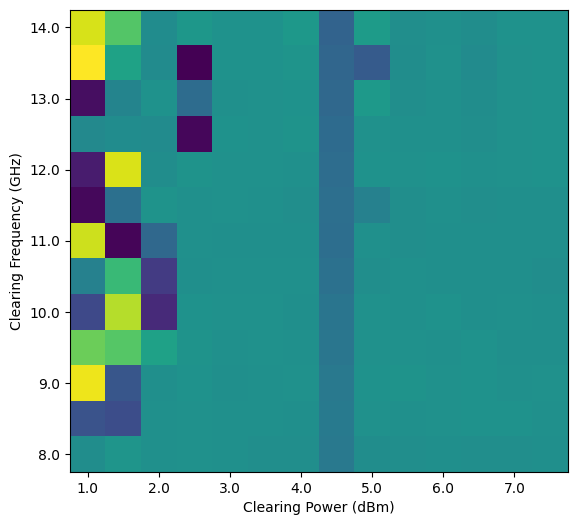

In [81]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.set_xticklabels(clearing_power[:,0])
ax.set_xlabel('Clearing Power (dBm)')
ax.set_ylabel('Clearing Frequency (GHz)')
ax.set_yticklabels(clearing_freq[0,:]/10**9)

ax.imshow(arr,cmap="viridis")
ax.invert_yaxis()
# ax.colorbar(label="resonance")
plt.show()


In [31]:
len(frequency)

1601

In [30]:
S21

array([-0.00070625+0.00030013j, -0.00071448+0.00027111j,
       -0.00068537+0.00025007j, ..., -0.00052809+0.00012513j,
       -0.00052009+0.00011983j, -0.0004968 +0.00015297j])

In [32]:
S21_log_mag = 20 * np.log10(np.abs(S21))

In [33]:
S21_log_mag

array([-62.2998666 , -62.33600558, -62.73875571, ..., -65.30863306,
       -65.45381816, -65.68294576])